In [24]:
import pandas as pd
df = pd.read_csv('../Dataset/marketing_campaign_initial.csv', sep = "\t") #where ..means 2 folders back to aim file
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [30]:
df['Education'].unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [28]:
len(df['Marital_Status'].unique())
df['Marital_Status'].unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [29]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [2]:
df['Income'] = df['Income'].fillna(value = df['Income'].median())

In [3]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [4]:
for column in ['Education', 'Marital_Status']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies
    
df = df.drop(columns = ['Dt_Customer','Education', 'Marital_Status'])

In [5]:
df.shape

(2240, 39)

In [6]:
from sklearn.preprocessing import MinMaxScaler

X = df.values
min_max_scaler = MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
df_scaled = pd.DataFrame(X_scaled, columns = list(df.columns))
df_scaled

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,0.493611,0.621359,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,0.664093,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.194263,0.592233,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,0.007722,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.370029,0.699029,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.552408,0.883495,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,0.038610,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.475739,0.854369,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,0.177606,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0.971316,0.718447,0.089472,0.0,0.5,0.464646,0.474883,0.216080,0.105507,0.162162,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2236,0.357519,0.514563,0.093669,1.0,0.5,0.565657,0.271936,0.000000,0.017391,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2237,0.649629,0.854369,0.083092,0.0,0.0,0.919192,0.608171,0.241206,0.125797,0.123552,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2238,0.735859,0.611650,0.101536,0.0,0.5,0.080808,0.286671,0.150754,0.124058,0.308880,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(df_scaled)
y_pred

array([2, 2, 0, ..., 2, 0, 1])

In [20]:
df[y_pred == 0].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,...,480.000000,480.000000,480.0,480.0,480.0,480.0,480.0,480.0,480.0,480.0
mean,5489.241667,1971.489583,51002.590625,0.464583,0.406250,49.506250,288.331250,26.835417,182.108333,38.216667,...,0.156250,0.204167,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
std,3259.472823,12.872098,22019.777240,0.543318,0.532417,28.632871,333.111329,40.479485,243.333137,55.047512,...,0.363471,0.403512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.000000,1893.000000,3502.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25%,2801.750000,1962.000000,33919.250000,0.000000,0.000000,26.000000,20.000000,2.000000,15.000000,3.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
50%,5210.500000,1972.000000,49277.500000,0.000000,0.000000,51.000000,153.500000,9.000000,65.000000,12.000000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
75%,8319.750000,1982.000000,68634.000000,1.000000,1.000000,75.000000,480.750000,32.250000,260.750000,52.500000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
max,11187.000000,1995.000000,113734.000000,2.000000,2.000000,99.000000,1332.000000,199.000000,984.000000,250.000000,...,1.000000,1.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
df_scaled[y_pred == 2].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,...,896.000000,896.00000,896.000000,896.000000,896.000000,896.0,896.0,896.000000,896.000000,896.000000
mean,0.501096,0.714773,0.077702,0.210938,0.277344,0.502007,0.212051,0.133486,0.095579,0.151441,...,0.175223,0.21875,0.002232,0.003348,0.258929,0.0,0.0,0.647321,0.085938,0.002232
std,0.288645,0.113214,0.044266,0.264539,0.270175,0.288793,0.225741,0.200651,0.124868,0.219139,...,0.380370,0.41363,0.047219,0.057799,0.438291,0.0,0.0,0.478071,0.280428,0.047219
min,0.001162,0.058252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
25%,0.260388,0.631068,0.052490,0.000000,0.000000,0.262626,0.017415,0.005025,0.009275,0.010618,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
50%,0.494370,0.728155,0.075807,0.000000,0.500000,0.515152,0.129940,0.040201,0.040290,0.046332,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.0,1.000000,0.000000,0.000000
75%,0.758422,0.805825,0.100689,0.500000,0.500000,0.757576,0.348459,0.165829,0.136232,0.200772,...,0.000000,0.00000,0.000000,0.000000,1.000000,0.0,0.0,1.000000,0.000000,0.000000
max,1.000000,0.980583,1.000000,1.000000,1.000000,1.000000,0.999330,0.974874,1.000000,1.000000,...,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,1.000000,1.000000


In [21]:
df_scaled[y_pred == 1].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
count,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,864.000000,...,864.000000,864.000000,864.0,864.0,864.0,864.0,864.0,864.0,864.0,864.0
mean,0.503365,0.743494,0.075183,0.228009,0.255787,0.487654,0.200590,0.129321,0.093149,0.136605,...,0.159722,0.222222,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
std,0.291223,0.110723,0.032127,0.272498,0.274381,0.298342,0.226378,0.197244,0.130952,0.201072,...,0.366560,0.415981,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.466019,0.001078,0.000000,0.000000,0.000000,0.000000,0.000000,0.000580,0.000000,...,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,0.249598,0.660194,0.050955,0.000000,0.000000,0.229798,0.015405,0.005025,0.008696,0.011583,...,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
50%,0.494996,0.757282,0.074881,0.000000,0.000000,0.484848,0.115874,0.035176,0.037101,0.046332,...,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
75%,0.752122,0.825243,0.098894,0.500000,0.500000,0.739899,0.323510,0.165829,0.125797,0.177606,...,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
max,0.999106,1.000000,0.239231,1.000000,1.000000,1.000000,1.000000,0.989950,1.000000,0.980695,...,1.000000,1.000000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [22]:
864+896+480

2240

In [8]:
from sklearn.cluster import DBSCAN  

dbscan = DBSCAN(eps = 0.45, min_samples=2)
y_pred_DB = dbscan.fit_predict(df_scaled)
y_pred_DB

array([-1,  0, -1, ..., -1,  3, -1], dtype=int64)

In [44]:
df_scaled[y_pred_DB == -1].describe().head(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
count,1064.00000,1064.000000,1064.000000,1064.000,1064.000000,1064.000000,1064.000000,1064.000000,1064.00000,1064.000000,...,1064.000000,1064.000000,1064.00000,1064.00000,1064.00000,1064.000000,1064.000000,1064.000000,1064.00000,1064.00000
mean,0.50156,0.720226,0.092729,0.125,0.239192,0.482684,0.316765,0.216831,0.16066,0.236719,...,0.178571,0.236842,0.00188,0.00282,0.12594,0.359023,0.216165,0.228383,0.06391,0.00188


In [33]:
20+48+24+3+1064

1159

In [45]:
dbscan.labels_

array([-1,  0, -1, ..., -1,  3, -1], dtype=int64)

In [24]:
# from sklearn.metrics import silhouette_score

# silhouette_score(df, y_pred_DB)

In [46]:
from sklearn.manifold import MDS

mds = MDS(n_components=2)
mds_data = mds.fit_transform(df_scaled)

In [47]:
mds_data

array([[-1.32241163, -1.2203237 ],
       [-0.47135467, -0.90068719],
       [-1.04470589, -0.17051864],
       ...,
       [-1.69422605,  0.88854764],
       [ 0.73150372, -0.7653208 ],
       [ 1.50617458,  0.53290291]])

In [48]:
mds_data[:, 0]

array([-1.32241163, -0.47135467, -1.04470589, ..., -1.69422605,
        0.73150372,  1.50617458])

In [49]:
mds_data[:, 1]

array([-1.2203237 , -0.90068719, -0.17051864, ...,  0.88854764,
       -0.7653208 ,  0.53290291])

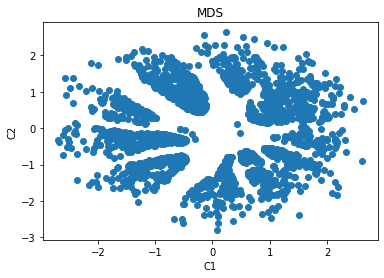

In [50]:
import matplotlib.pyplot as plt

plt.scatter(x = mds_data[:, 0], y = mds_data[:, 1])
plt.title('MDS')
plt.xlabel('C1')
plt.ylabel('C2')
plt.show();

In [51]:
from sklearn.manifold import TSNE

tsne_model = TSNE(n_components=2)
tsne_data = tsne_model.fit_transform(df_scaled)

In [52]:
tsne_data

array([[-37.863   ,  -9.889307],
       [-60.85577 ,  -8.664914],
       [ -9.388675,  40.842644],
       ...,
       [  7.620872,  13.946758],
       [-38.209187,  29.275406],
       [ 51.861767,  -5.038295]], dtype=float32)

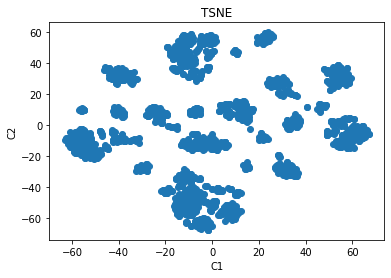

In [54]:
plt.scatter(x = tsne_data[:, 0], y = tsne_data[:, 1])
plt.title('TSNE')
plt.xlabel('C1')
plt.ylabel('C2')
plt.show();

In [ ]:
# almost done

### trying with new data

In [52]:
kmeans

KMeans(n_clusters=3)

In [53]:
dbscan

DBSCAN(eps=0.45, min_samples=2)

In [66]:
df_new = pd.read_csv('../Dataset/new_clients_marketing.csv', sep = ";") #where ..means 2 folders back to aim file
df_new.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,3344.0,1984.0,Graduation,Single,58138.0,0.0,0.0,05.09.2012,58.0,635.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,11.0,1.0
1,4455.0,1970.0,PhD,Together,130000.0,2.0,3.0,05.08.2013,20.0,800.0,...,10.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,15.0,2.0
2,NaN,NaN,Master,Married,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,Basic,Divorced,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,2n Cycle,Widow,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
df_new.shape

(8, 29)

In [68]:
df_new.isnull().sum()

ID                     6
Year_Birth             6
Education              3
Marital_Status         0
Income                 6
Kidhome                6
Teenhome               6
Dt_Customer            6
Recency                6
MntWines               6
MntFruits              6
MntMeatProducts        6
MntFishProducts        6
MntSweetProducts       6
MntGoldProds           6
NumDealsPurchases      6
NumWebPurchases        6
NumCatalogPurchases    6
NumStorePurchases      6
NumWebVisitsMonth      6
AcceptedCmp3           6
AcceptedCmp4           6
AcceptedCmp5           6
AcceptedCmp1           6
AcceptedCmp2           6
Complain               6
Z_CostContact          6
Z_Revenue              6
Response               6
dtype: int64

In [69]:
for column in ['Education', 'Marital_Status']:
    dummies = pd.get_dummies(df_new[column])
    df_new[dummies.columns] = dummies
    
df_new = df_new.drop(columns = ['Dt_Customer','Education', 'Marital_Status'])

In [70]:
df_new.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,3344.0,1984.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0,0,0,0,0,0,1,0,0,0
1,4455.0,1970.0,130000.0,2.0,3.0,20.0,800.0,120.0,750.0,200.0,...,0,1,0,0,0,0,0,1,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,1,0,0,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0


In [71]:
df_new.shape

(8, 39)

In [72]:
df_new.head(2)

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
0,3344.0,1984.0,58138.0,0.0,0.0,58.0,635.0,88.0,546.0,172.0,...,0,0,0,0,0,0,1,0,0,0
1,4455.0,1970.0,130000.0,2.0,3.0,20.0,800.0,120.0,750.0,200.0,...,0,1,0,0,0,0,0,1,0,0


In [73]:
df_final = df_new.head(2)

In [81]:
df_final.shape

(2, 39)

In [21]:
df_new.columns.values

array(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', 'Graduation', 'Single'],
      dtype=object)

In [23]:
df.columns.values

array(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', '2n Cycle', 'Basic',
       'Graduation', 'Master', 'PhD', 'Absurd', 'Alone', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'YOLO'], dtype=object)

In [75]:
df_final.columns.values

array(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4',
       'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain',
       'Z_CostContact', 'Z_Revenue', 'Response', '2n Cycle', 'Basic',
       'Graduation', 'Master', 'PhD', 'Absurd', 'Alone', 'Divorced',
       'Married', 'Single', 'Together', 'Widow', 'YOLO'], dtype=object)

In [76]:
kmeans_predict = kmeans.predict(df_final)
kmeans_predict

array([0, 0])

In [79]:
df_final[df_final == 0].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
count,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,2.0,2.0
mean,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0
min,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
dbscan_predict = dbscan.fit_predict(df_final)
dbscan_predict

array([-1], dtype=int64)

In [83]:
ID = df_final['ID']

In [84]:
ID

0    3344.0
1    4455.0
Name: ID, dtype: float64

In [85]:
kmeans_result = pd.DataFrame({'ID': ID,
                       'predict': kmeans_predict})
kmeans_result.to_csv('Mirbek_cluster_Predict.csv', index = False)

In [93]:
print(df_final['ID'].value_counts().index[0])
print(df_final['ID'].value_counts().index[1])

4455.0
3344.0


In [94]:
df_final['Single'].value_counts()

1    1
0    1
Name: Single, dtype: int64

In [96]:
df_final['ID'].count()

2

### just to check that model works appropriate

In [97]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [100]:
df['Income'] = df['Income'].fillna(value = df['Income'].median())

In [101]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [102]:
for column in ['Education', 'Marital_Status']:
    dummies = pd.get_dummies(df[column])
    df[dummies.columns] = dummies
    
df = df.drop(columns = ['Dt_Customer','Education', 'Marital_Status'])

In [104]:
df.shape

(2240, 39)

In [105]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3)
y_pred = kmeans.fit_predict(df)
y_pred

array([0, 1, 0, ..., 0, 0, 0])

In [107]:
df[y_pred == 1].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
count,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,...,1167.000000,1167.000000,1167.0,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000,1167.000000
mean,5556.399314,1970.840617,35014.613539,0.711225,0.477292,49.295630,83.487575,7.467866,39.457584,11.646958,...,0.167095,0.190231,0.0,0.001714,0.099400,0.376178,0.233933,0.257926,0.029135,0.001714
std,3271.177784,11.405302,11283.216501,0.521973,0.540907,29.093199,139.669254,14.937966,83.734417,22.824270,...,0.373221,0.392652,0.0,0.041380,0.299327,0.484633,0.423512,0.437681,0.168256,0.041380
min,9.000000,1900.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2719.500000,1963.000000,26930.500000,0.000000,0.000000,24.000000,9.000000,1.000000,8.000000,2.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5424.000000,1972.000000,36038.000000,1.000000,0.000000,49.000000,26.000000,3.000000,18.000000,4.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8357.500000,1979.000000,44320.500000,1.000000,1.000000,75.000000,95.500000,8.000000,45.500000,12.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,11191.000000,1996.000000,52614.000000,2.000000,2.000000,99.000000,1181.000000,151.000000,1725.000000,208.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [109]:
df[y_pred == 0].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
count,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,...,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.000000,1072.0
mean,5627.507463,1966.583022,70414.500933,0.152985,0.538246,48.930970,544.194963,46.817164,305.879664,65.724813,...,0.163246,0.246269,0.001866,0.000933,0.108209,0.396455,0.193097,0.259328,0.040112,0.0
std,3220.268038,12.210824,12866.597776,0.382764,0.546982,28.834356,323.737563,47.500142,248.644902,64.383986,...,0.369763,0.431038,0.043173,0.030542,0.310789,0.489389,0.394913,0.438471,0.196313,0.0
min,0.000000,1893.000000,52750.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,2893.250000,1957.000000,61271.000000,0.000000,0.000000,24.000000,292.750000,10.750000,109.000000,14.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,5521.500000,1967.000000,69109.000000,0.000000,1.000000,50.000000,502.000000,29.000000,239.000000,43.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,8539.000000,1975.000000,78049.500000,0.000000,1.000000,73.000000,753.250000,71.000000,445.000000,101.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.0
max,11181.000000,1995.000000,162397.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [149]:
df.iloc[:, 10:20]

,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5
0,88,88,3,8,10,4,7,0,0,0
1,1,6,2,1,1,2,5,0,0,0
2,21,42,1,8,2,10,4,0,0,0
3,3,5,2,2,0,4,6,0,0,0
4,27,15,5,5,3,6,5,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2235,118,247,2,9,3,4,5,0,0,0
2236,0,8,7,8,2,5,7,0,0,0
2237,12,24,1,2,3,13,6,0,1,0
2238,30,61,2,6,5,10,3,0,0,0


In [112]:
df[y_pred == 2].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Master,PhD,Absurd,Alone,Divorced,Married,Single,Together,Widow,YOLO
count,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
mean,9432.0,1977.0,666666.0,1.0,0.0,23.0,9.0,14.0,18.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,9432.0,1977.0,666666.0,1.0,0.0,23.0,9.0,14.0,18.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
25%,9432.0,1977.0,666666.0,1.0,0.0,23.0,9.0,14.0,18.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
50%,9432.0,1977.0,666666.0,1.0,0.0,23.0,9.0,14.0,18.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
75%,9432.0,1977.0,666666.0,1.0,0.0,23.0,9.0,14.0,18.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
max,9432.0,1977.0,666666.0,1.0,0.0,23.0,9.0,14.0,18.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [113]:
1167+1072+1

2240